In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c

from tvolib import mpl_utils as mu

from wimh.utils.distribution_function import f_maxwellian, f_kappa


def f_model(V_para, V_perp):
    # See fit results in measured_distribution.ipynb
    nc = 75.63 * u.Unit("cm-3")
    Vthc = 3.20 * u.Unit("1000 km/s")
    nh = 96.46 * u.Unit("cm-3")
    Vthh = 2.56 * u.Unit("1000 km/s")
    kh = 4.31
    ns = 5.35 * u.Unit("cm-3")
    Vths_para = 4.45 * u.Unit("1000 km/s")
    Vths_perp = 3.32 * u.Unit("1000 km/s")
    Vs_drift = 4.13 * u.Unit("1000 km/s")
    ks = 9.13
    return (f_maxwellian(V_para, V_perp, n=nc, Vth_para=Vthc, Vth_perp=Vthc)
            + f_kappa(V_para, V_perp, n=nh, Vth_para=Vthh, Vth_perp=Vthh, kappa=kh)
            + f_kappa(V_para, V_perp, n=ns, Vth_para=Vths_para, Vth_perp=Vths_perp, V_drift=Vs_drift, kappa=ks))

Below, we plot the modeled distribution function in velocity space

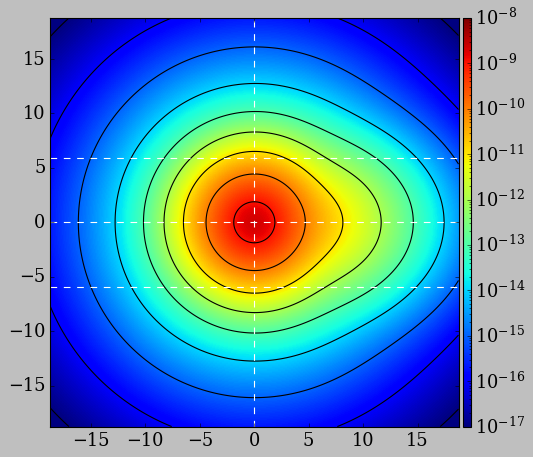

In [3]:
W_max = 1000 * u.eV
V_max = np.sqrt(2 * W_max / c.si.m_e).to(u.Unit("1000 km/s"))

V_para_arr = np.linspace(-V_max, V_max, 1000)
V_perp_arr = np.linspace(-V_max, V_max, 1000)
V_para, V_perp = np.meshgrid(V_para_arr, V_perp_arr, indexing="ij")
V = np.sqrt(V_para**2 + V_perp**2)

f = f_model(V_para, V_perp)

fig, ax = mu.plt.subplots(1, 1)

cax = mu.add_colorbar(ax)
ax.contour(V_para.value, V_perp.value, f.value, levels=np.logspace(-17, -8, 10), colors="k", norm=mu.mplc.LogNorm())
im = ax.pcolormesh(V_para.value, V_perp.value, f.value, cmap="jet", norm=mu.mplc.LogNorm(1e-17, 1e-8))
fig.colorbar(im, cax=cax)

ax.set_aspect("equal")
ax.set_xlim(V_para.value.min(), V_para.value.max())
ax.set_ylim(V_perp.value.min(), V_perp.value.max())
ax.axvline(0, c="w", ls="--")
ax.axhline(0, c="w", ls="--")
ax.axhline(np.sqrt(2 * 100 * u.eV / c.si.m_e).to(u.Unit("1000 km/s")).value, c="w", ls="--")
ax.axhline(-np.sqrt(2 * 100 * u.eV / c.si.m_e).to(u.Unit("1000 km/s")).value, c="w", ls="--")

fig.tight_layout()

mu.plt.show()